# Interpolation

In [2]:
from scipy import interpolate
from numpy import polynomial as P

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [3]:
p1 = P.Polynomial([1,2,3])
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [4]:
p2 = P.Polynomial.fromroots([-1,1])
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [5]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [6]:
p2.roots()

array([-1.,  1.])

In [7]:
p1.coef

array([1., 2., 3.])

In [8]:
p1.domain

array([-1,  1])

In [9]:
p1.window

array([-1,  1])

In [10]:
p1(np.array([1.5,2.5,3.5]))

array([10.75, 24.75, 44.75])

In [11]:
p1 = P.Polynomial.fromroots([1,2,3])
p1

Polynomial([-6., 11., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [12]:
p2 = P.Polynomial.fromroots([2])
p2

Polynomial([-2.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [14]:
p3 = p1 // p2
p3

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [15]:
p3.roots()

array([1., 3.])

In [16]:
c1 = P.Chebyshev([1,2,3])
c1

Chebyshev([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [17]:
c1.roots()

array([-0.76759188,  0.43425855])

In [18]:
c1 = P.Chebyshev.fromroots([-1,1])
c1

Chebyshev([-0.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.])

In [19]:
l1 = P.Legendre.fromroots([-1,1])
l1

Legendre([-0.66666667,  0.        ,  0.66666667], domain=[-1.,  1.], window=[-1.,  1.])

In [20]:
c1(np.array([0.5,1.5,2.5]))

array([-0.75,  1.25,  5.25])

In [21]:
l1(np.array([0.5,1.5,2.5]))

array([-0.75,  1.25,  5.25])

In [22]:
x = np.array([1,2,3,4])
y = np.array([1,3,5,4])

In [23]:
deg = len(x)-1
A = P.polynomial.polyvander(x,deg)
c = linalg.solve(A,y)
c

array([ 2. , -3.5,  3. , -0.5])

In [24]:
f1 = P.Polynomial(c)
f1(2.5)

4.187499999999998

In [25]:
A = P.chebyshev.chebvander(x,deg)
c = linalg.solve(A,y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [26]:
f2 = P.Chebyshev(c)
f2(2.5)

4.187499999999999

Text(0.5, 0, '$x$')

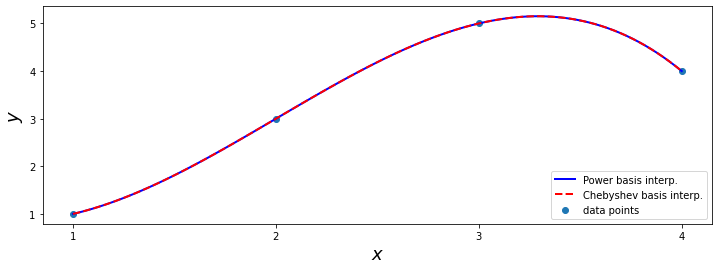

In [27]:
xx = np.linspace(x.min(), x.max(), 100)
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(xx, f1(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=2, label='Chebyshev basis interp.')
ax.scatter(x,y,label='data points')
ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

In [28]:
f1b = P.Polynomial.fit(x,y,deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [29]:
f2b = P.Chebyshev.fit(x,y,deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])

In [30]:
def runge(x):
    return 1/(1+25*x**2)

def runge_interpolate(n):
    x = np.linspace(-1,1,n+1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x,p

Text(0.5, 0, '$x$')

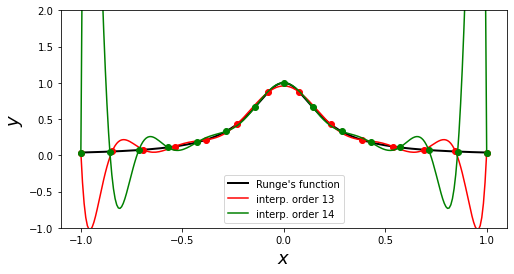

In [32]:
xx = np.linspace(-1,1,250)
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.plot(xx, runge(xx), 'k', lw = 2, label="Runge's function")

n = 13

x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order {}'.format(n))

n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order {}'.format(n))

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1,2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

Text(0.5, 0, '$x$')

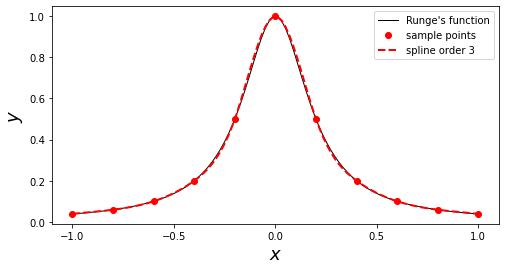

In [34]:
x = np.linspace(-1,1,11)
y = runge(x)
f_i = interpolate.interp1d(x,y,kind = 3)

xx = np.linspace(-1,1,100)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x,y, 'ro', label='sample points')
ax.plot(xx, f_i(xx), 'r--', lw = 2, label='spline order 3')
ax.legend()
ax.set_xticks([-1,-0.5,0, 0.5,1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

Text(0.5, 0, '$x$')

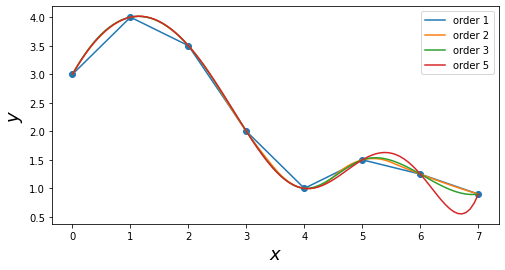

In [36]:
x = np.array([0,1,2,3,4,5,6,7])
y = np.array([3,4,3.5,2,1,1.5,1.25,0.9])
xx = np.linspace(x.min(), x.max(), 100)
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(x,y)

for n in [1,2,3,5]:
    f = interpolate.interp1d(x,y,kind=n)
    ax.plot(xx,f(xx), label='order {}'.format(n))
ax.legend()
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

In [65]:
x = y = np.linspace(-2, 2, 10)
def f(x,y):
    return np.exp(-(x+.5)**2 - 2*(y+.5)**2) - np.exp(-(x-.5)**2 -2*(y-.5)**2)

In [66]:
X, Y = np.meshgrid(x,y)
Z = f(X,Y)+0.05*np.random.randn(*X.shape)

In [67]:
f_i = interpolate.interp2d(x,y,Z,kind = 'cubic')

In [68]:
xx = yy = np.linspace(x.min(), x.max(),100)
ZZi = f_i(xx,yy)
XX,YY = np.meshgrid(xx,yy)

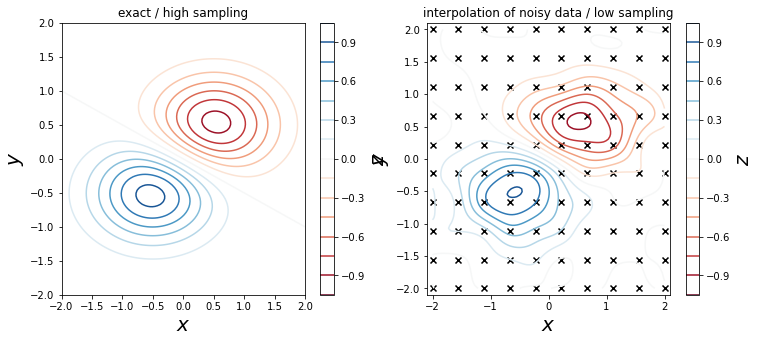

In [69]:
fig, axes = plt.subplots(1,2,figsize=(12,5))#, sharey=True)

c = axes[0].contour(XX,YY, f(XX,YY), 15, cmap = plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact / high sampling")
cb =fig.colorbar(c, ax = axes[0])
cb.set_label(r"$z$", fontsize=20)

c = axes[1].contour(XX,YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1,2.1)
axes[1].set_xlim(-2.1,2.1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X,Y,marker = 'x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)

In [70]:
def f(x,y):
    return np.exp(-x**2 - y**2)*np.cos(4*x)*np.sin(6*y)

N = 500
xdata = np.random.uniform(-1,1,N)
ydata = np.random.uniform(-1,1,N)
zdata = f(xdata,ydata)

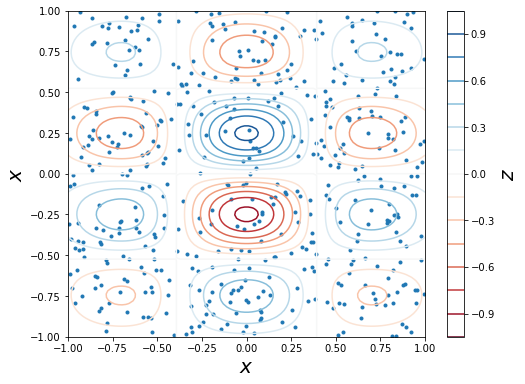

In [71]:
x = y = np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

fig, ax = plt.subplots(figsize=(8,6))

c = ax.contour(X,Y,Z, 15, cmap=plt.cm.RdBu)
ax.scatter(xdata, ydata, marker='.')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$x$", fontsize=20)
cb = fig.colorbar(c,ax=ax)
cb.set_label(r"$z$", fontsize=20)

In [72]:
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata,ydata),zdata, (X,Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata,ydata),zdata, (X,Y), method='linear')
    Zi_2 = interpolate.griddata((xdata,ydata),zdata, (X,Y), method='cubic')
    
    return Zi_0, Zi_1, Zi_2

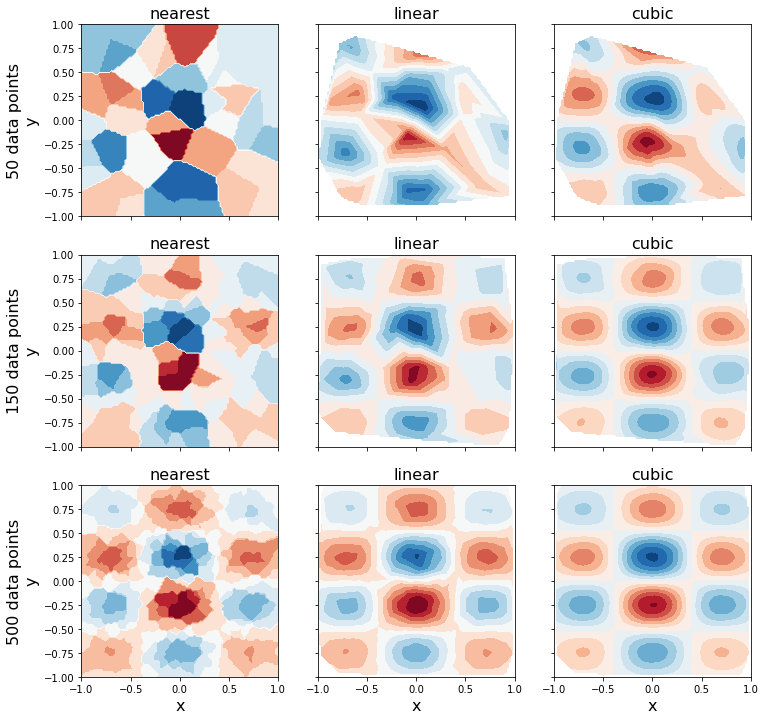

In [77]:
fig, axes = plt.subplots(3,3, figsize=(12,12), sharex = True, sharey=True)

n_vec = [50,150,500]
for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_2 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx,0].contourf(X,Y, Zi_0,15,cmap=plt.cm.RdBu)
    axes[idx,0].set_ylabel("{} data points\ny".format(n), fontsize=16)
    axes[idx,0].set_title('nearest', fontsize=16)
    axes[idx,1].contourf(X,Y,Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx,1].set_title("linear", fontsize=16)
    axes[idx,2].contourf(X,Y,Zi_2,15,cmap=plt.cm.RdBu)
    axes[idx,2].set_title("cubic", fontsize=16)

for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)
    